In [ ]:
!pip install tensorflow
!pip install tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

GPU enabled: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Corrupted images removed
Found 19964 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.
Class labels: {'Cat': 0, 'Dog': 1}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5182 - loss: 0.9559Epoch 1/30 - Loss: 0.8245 | Val Loss: 0.7184
156/156 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.5184 - loss: 0.9551 - val_accuracy: 0.6538 - val_loss: 0.7184
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6386 - loss: 0.7015Epoch 2/30 - Loss: 0.6849 | Val Loss: 0.6242
156/156 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.6386 - loss: 0.7014 - val_accuracy: 0.7069 - val_loss: 0.6242
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6912 - loss: 0.6348Epoch 3/30 - Loss: 0.6357 | Val Loss: 0.6102
156/156 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.6912 - loss: 0.6348 - val_accuracy: 0.7073 - val_loss: 0.6102
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6958 - loss: 0.6299Epoch 4/30 - Loss: 0.6270 | Val Loss: 0.5730
156/156 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.6958 - loss: 0.6298 - val_accuracy: 0.7389 - val_loss: 0.5730
Epoch 5/30
1

Model saved successfully


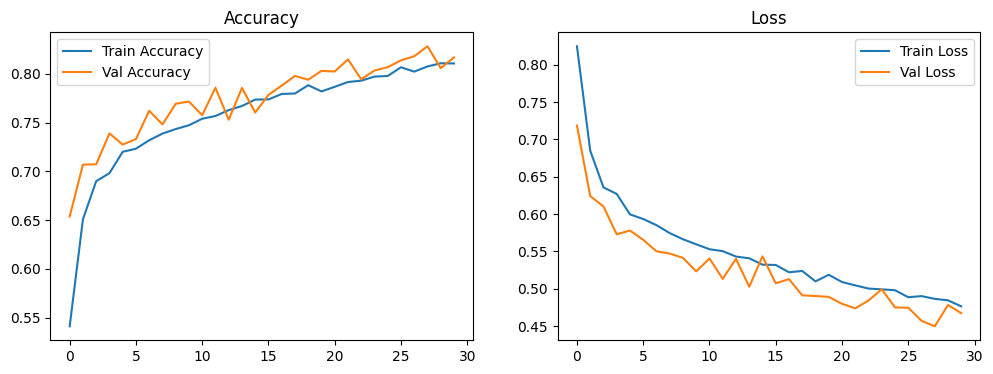

In [ ]:
# =========================================
# DOG vs CAT CLASSIFICATION (GPU + REGULARIZATION)
# =========================================

# 1. Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from tqdm.keras import TqdmCallback

# -----------------------------------------
# 2. Enable GPU (if available)
# -----------------------------------------
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU enabled:", gpus)
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found, using CPU")

# -----------------------------------------
# 3. Dataset path & parameters
# -----------------------------------------
DATASET_PATH = "/content/drive/MyDrive/PetImages"
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 128
EPOCHS = 30

# -----------------------------------------
# 4. Remove corrupted images
# -----------------------------------------
for folder in ['Dog', 'Cat']:
    folder_path = os.path.join(DATASET_PATH, folder)
    for img_file in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img_file)
            img = Image.open(img_path)
            img.verify()
        except:
            os.remove(img_path)

print("Corrupted images removed")

# -----------------------------------------
# 5. Data Generator (with augmentation)
# -----------------------------------------
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

print("Class labels:", train_data.class_indices)

# -----------------------------------------
# 6. Custom Callback to Print Loss per Epoch
# -----------------------------------------
class LossPrinterCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(
            f"Epoch {epoch+1}/{EPOCHS} - "
            f"Loss: {logs['loss']:.4f} | "
            f"Val Loss: {logs['val_loss']:.4f}"
        )

# -----------------------------------------
# 7. Build & Train Model (L2 Regularization)
# -----------------------------------------
with tf.device('/GPU:0' if gpus else '/CPU:0'):

    model = Sequential([

        Conv2D(
            32, (3,3),
            activation='relu',
            kernel_regularizer=l2(0.001),
            input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
        ),
        MaxPooling2D(2,2),

        Conv2D(
            64, (3,3),
            activation='relu',
            kernel_regularizer=l2(0.001)
        ),
        MaxPooling2D(2,2),

        Conv2D(
            128, (3,3),
            activation='relu',
            kernel_regularizer=l2(0.001)
        ),
        MaxPooling2D(2,2),

        Flatten(),

        Dense(
            128,
            activation='relu',
            kernel_regularizer=l2(0.001)
        ),
        Dropout(0.5),

        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    model.summary()

    history = model.fit(
        train_data,
        epochs=EPOCHS,
        validation_data=val_data,
        callbacks=[
            TqdmCallback(verbose=1),
            LossPrinterCallback()
        ]
    )

# -----------------------------------------
# 8. Save Model
# -----------------------------------------
model.save("/content/drive/MyDrive/dog_cat_model_regularized.h5")
print("Model saved successfully")

# -----------------------------------------
# 9. Plot Accuracy & Loss
# -----------------------------------------
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()

# -----------------------------------------
# 10. Predict Single Image
# -----------------------------------------
def predict_image(img_path):
    img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)

    if prediction[0][0] > 0.5:


        print("Prediction: Dog 🐶")
    else:
        print("Prediction: Cat 🐱")


In [ ]:
def predict_folder_with_plot(folder_path, cols=3):
    image_files = [
        f for f in os.listdir(folder_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.webp'))
    ]

    rows = int(np.ceil(len(image_files) / cols))
    plt.figure(figsize=(cols * 4, rows * 4))

    for i, file_name in enumerate(image_files):
        img_path = os.path.join(folder_path, file_name)

        # Load image for model
        img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array, verbose=0)[0][0]

        label = "Dog" if prediction > 0.5 else "Cat"
        confidence = prediction if prediction > 0.5 else 1 - prediction

        # Plot
        plt.subplot(rows, cols, i + 1)
        plt.imshow(load_img(img_path))
        plt.axis("off")
        plt.title(f"{label}\nConfidence: {confidence:.2%}")

    plt.tight_layout()
    plt.show()


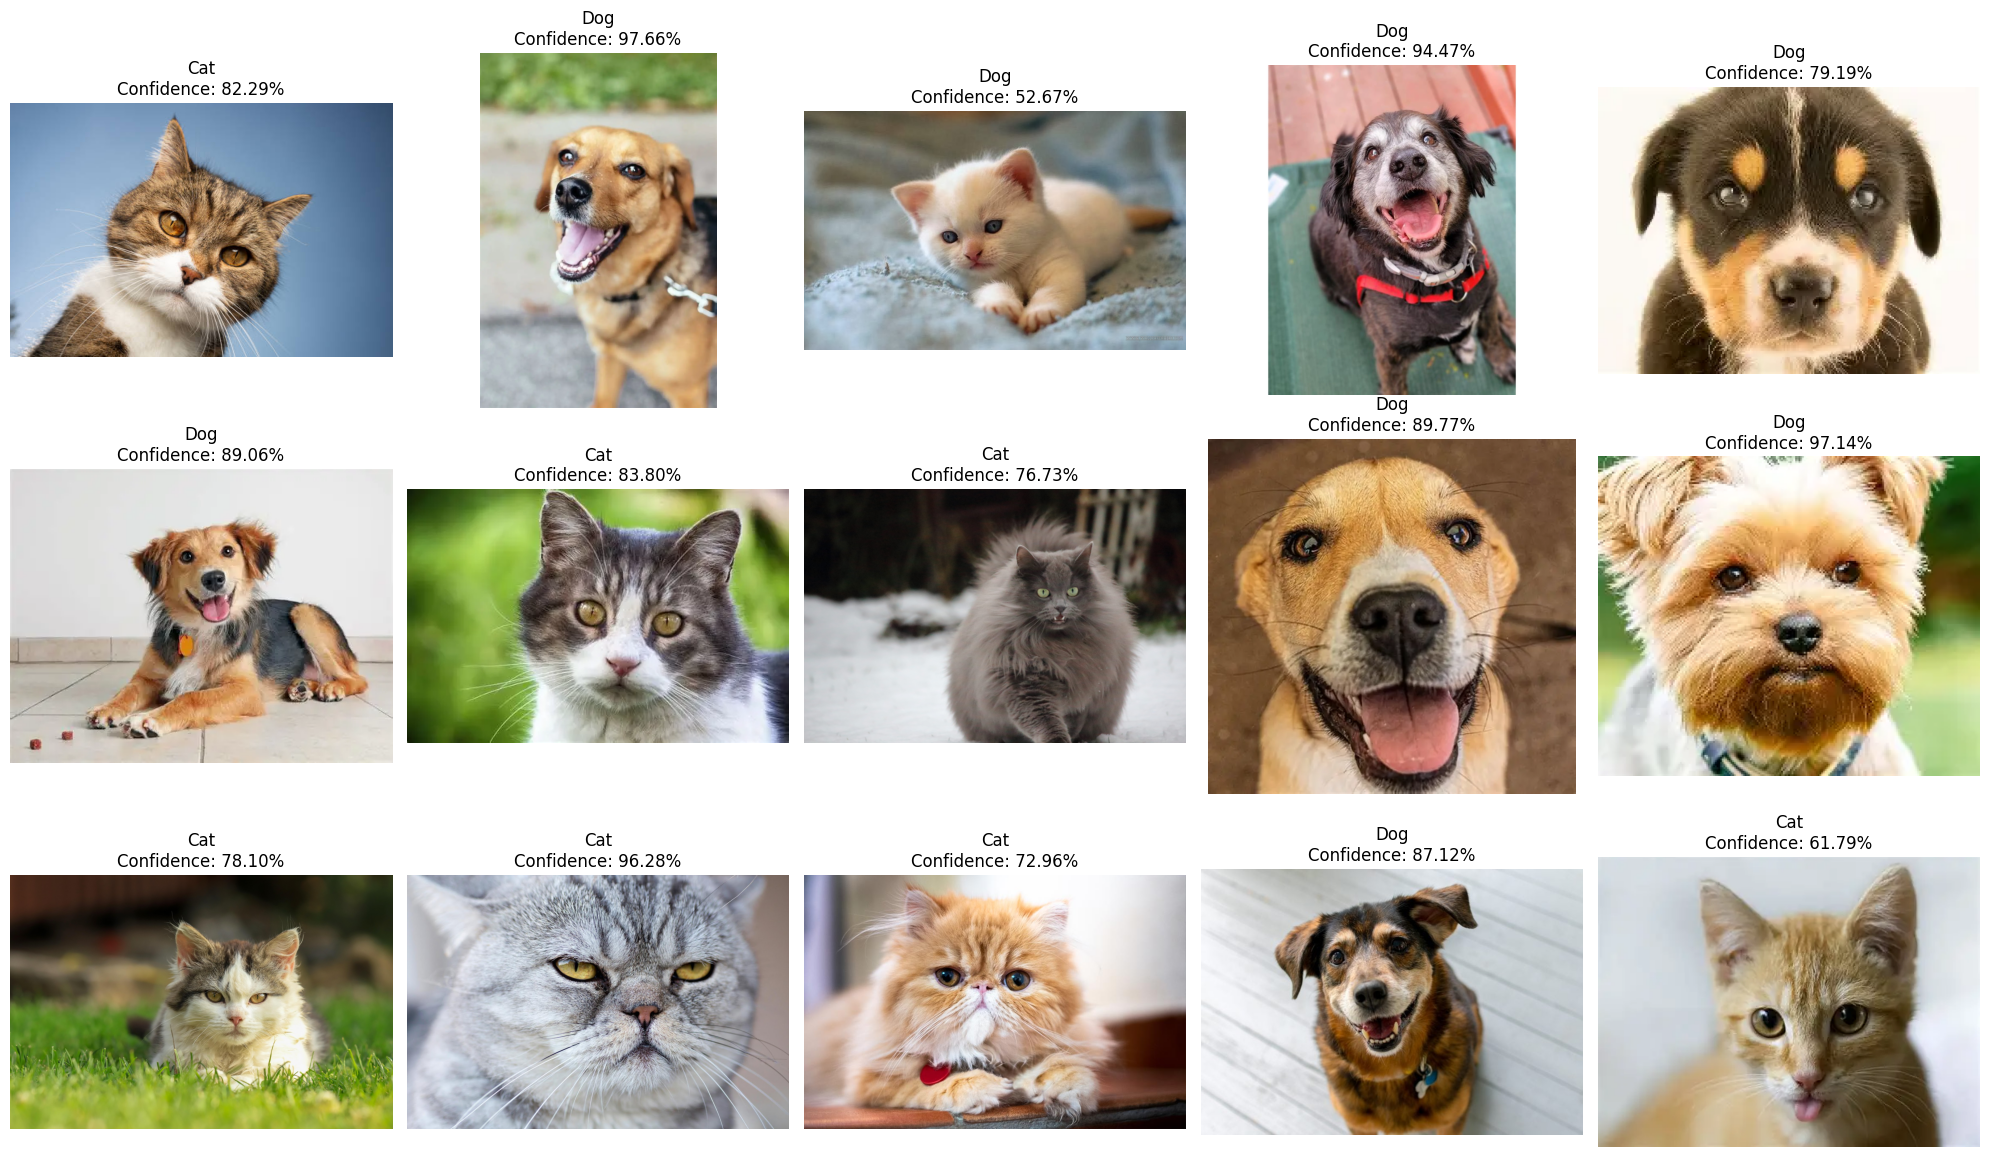

In [ ]:
folder_path = "/content"
predict_folder_with_plot(folder_path, cols=5)
